![image.png](https://i.imgur.com/a3uAqnb.png)

## 1-🔍 Introduction to Attention: Motivation & Conceptual Overview

### 🌟 Why Do We Need Attention?

In traditional **Sequence-to-Sequence (Seq2Seq)** models, such as those used for **machine translation** or **text summarization**, we map an input sequence (e.g., a sentence in English) to an output sequence (e.g., the same sentence in Arabic (like the previous lab ).

👉 However, these models face key challenges:
- The **entire input sequence is compressed into a single fixed-length vector** (called the **context vector**).
- This **bottleneck** makes it difficult to capture all the necessary information, especially for **long sequences**.
- As a result, the quality of translations or predictions often **deteriorates** as the sequence length increases.

---

### 🧠 What is Attention?

The **Attention Mechanism** was introduced to **solve this bottleneck** by:
- Allowing the model to **dynamically focus** on different parts of the input sequence at **each step of the output generation**.
- Providing a **weighted combination** of all the encoder outputs, rather than forcing the decoder to rely on a single static vector.

🔑 In simple words:  
> **Attention tells the model where to look when producing each word.**

---

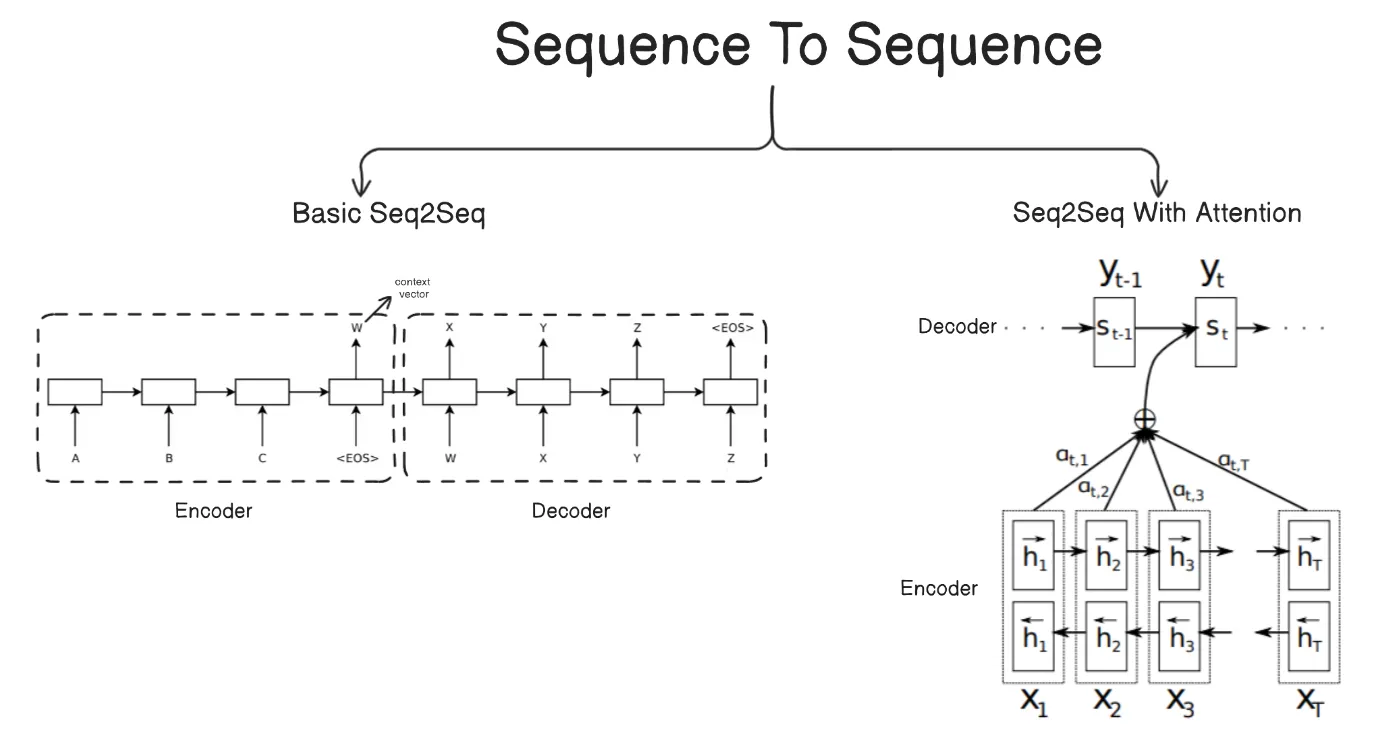


# 2-QKV: Queries, Keys, Values (The Heart of Attention)

## 📌 What are Queries, Keys, and Values?

In modern attention mechanisms, especially in **Transformers**, every word in the sequence is mapped into **three distinct vectors**:

* **Query (Q)**: Represents what we are **looking for**.
* **Key (K)**: Represents what we have in the **input**.
* **Value (V)**: Holds the **actual information** to extract if the Key matches the Query.

👉 The attention mechanism **compares Queries with Keys** to compute **attention scores** and then uses those scores to **weight the Values**.

---
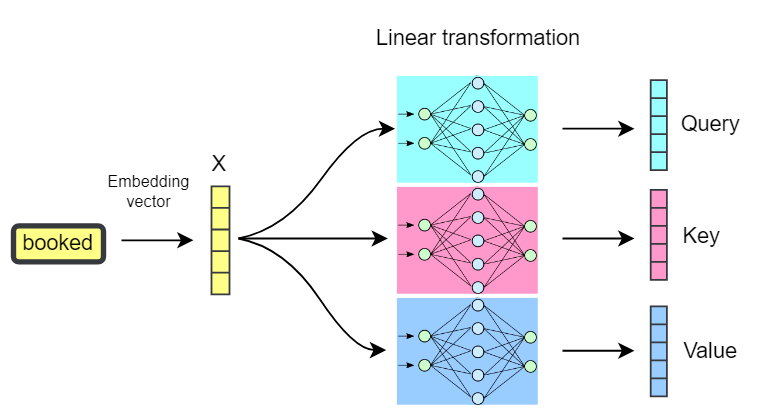



## 🔍 Understanding QKV with an Analogy

Think of attention like a **library search system**:

- **Query (Q)**: Your search request - "I'm looking for information about cats"
- **Key (K)**: The index/catalog of books - "This book is about animals"
- **Value (V)**: The actual content of the book - "Cats are domesticated mammals..."

The attention mechanism finds which **Keys** match your **Query** best, then retrieves the corresponding **Values**.

---

## 🧮 Mathematical Foundation

### Step 1: Linear Transformations
Starting with input embeddings **X**, we create three matrices:

```
Q = X @ W_Q    # Queries
K = X @ W_K    # Keys  
V = X @ W_V    # Values
```

Where `W_Q`, `W_K`, and `W_V` are learned weight matrices.

### Step 2: Attention Score Computation
```
scores = Q @ K.T                    # Dot product attention
scaled_scores = scores / √(d_k)     # Scale by sqrt of key dimension
attention_weights = softmax(scaled_scores)  # Normalize to probabilities
```

### Step 3: Weighted Value Aggregation
```
output = attention_weights @ V      # Weighted sum of values
```

---























Attention Weights:
 tensor([[0.0736, 0.2853, 0.6410],
        [0.0245, 0.4351, 0.5403],
        [0.0172, 0.2805, 0.7023]])
Attention Output:
 tensor([[1.8009, 1.0589, 2.0612, 2.1860],
        [1.8246, 0.9659, 2.1220, 2.3832],
        [1.8515, 1.0784, 2.1224, 2.2637]])


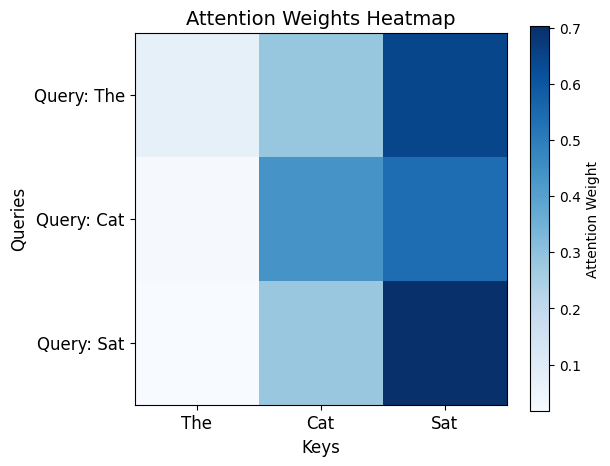

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# Input: 3 words → embeddings of size 4
words = ["The", "Cat", "Sat"]
X = torch.tensor([
    [1.0, 0.0, 1.0, 0.0],   # The
    [0.0, 2.0, 0.0, 2.0],   # Cat
    [1.0, 1.0, 1.0, 1.0]    # Sat
])  # Shape: (3, 4)


W_Q = torch.rand(4, 4)
W_K = torch.rand(4, 4)
W_V = torch.rand(4, 4)

# Compute Q, K, V
Q = X @ W_Q
K = X @ W_K
V = X @ W_V

# Compute attention scores
scores = Q @ K.T
scaled_scores = scores / torch.sqrt(torch.tensor(Q.size(-1), dtype=torch.float32))
attention_weights = F.softmax(scaled_scores, dim=-1)
output = attention_weights @ V


print("Attention Weights:\n", attention_weights)
print("Attention Output:\n", output)


plt.figure(figsize=(6, 5))
plt.imshow(attention_weights.detach().numpy(), cmap='Blues', interpolation='nearest')
plt.colorbar(label='Attention Weight')

plt.xticks(range(len(words)), words, fontsize=12)
plt.yticks(range(len(words)), [f'Query: {w}' for w in words], fontsize=12)

plt.title('Attention Weights Heatmap', fontsize=14)
plt.xlabel('Keys', fontsize=12)
plt.ylabel('Queries', fontsize=12)
plt.show()


# 🚀 Seq2Seq with Attention for Arabic-English Translation

In this lab, we will upgrade the basic Sequence-to-Sequence (Seq2Seq) model by adding an **Attention Mechanism**.  
The Attention mechanism allows the model to dynamically focus on different parts of the input sequence when generating each word in the output.

✅ **Key Objectives:**
- Understand the limitations of basic Seq2Seq models.
- Learn how to apply Attention to the decoding step.
- Implement and visualize Attention Weights.
- Improve translation quality on Arabic-English sentence pairs.

We will work with a small parallel corpus of **Arabic-English sentence pairs** to demonstrate the effect of Attention in machine translation.


In [ ]:
#uncomment if you are using your local machine otherwise you should download the
#data from "https://huggingface.co/datasets/Abdulmohsena/Classic-Arabic-English-Language-Pairs/tree/main/data"

#from datasets import load_dataset

# Load only the 'books' split
#dataset = load_dataset("Abdulmohsena/Classic-Arabic-English-Language-Pairs", split='books')

#print(f"✅ Dataset loaded: {len(dataset)} samples")

In [ ]:
import pandas as pd
dataset = pd.read_parquet('books-00000-of-00001.parquet')
print(dataset.columns)
print(dataset.shape)
print(dataset.head())


Index(['en', 'ar'], dtype='object')
(13331, 2)
                                                  en  \
0  [Chapter on entering upon kings] [Entering of ...   
1  If he approached him, he would come close to h...   
2              If he signals to him to sit, he sits.   
3  If he spoke to him, he would answer him in a l...   
4  If he is silent, he should get up immediately,...   

                                                  ar  
0  [باب في الدخول على الملوك] [دخول الأشراف] إن ك...  
1  فإن استدناه، قرب منه، فأكب على أطرافه يقبلها، ...  
2                        فإن أومأ إليه بالقعود، قعد.  
3            فإن كلمه، أجابه بانخفاض صوت، وقلة حركة.  
4  وإن سكت، نهض من ساعته، قبل أن يتمكن به مجلسه ب...  


**1-Vocabulary Analysis and Tokenization**

In [ ]:
import re
from collections import Counter

# 1. Simple tokenization function
def simple_tokenize(text):
    """
    Simple tokenization function that:
    1. Removes punctuation
    2. Splits on whitespace
    Note: For Arabic, proper tokenization is more complex!
    """
    if not isinstance(text, str):
        return []
    cleaned = re.sub(r'[^\w\s]', ' ', text)
    return cleaned.split()

arabic_words = []
english_words = []

for text in dataset['ar']:
    arabic_words.extend(simple_tokenize(text))

for text in dataset['en']:
    english_words.extend(simple_tokenize(text.lower()))

arabic_vocab = Counter(arabic_words)
english_vocab = Counter(english_words)

print(f"Arabic vocab: {len(arabic_vocab):,} unique words")
print(f"English vocab: {len(english_vocab):,} unique words")


Arabic vocab: 51,144 unique words
English vocab: 13,075 unique words


**2-Vocabulary Reduction and Mapping**

In [ ]:
import pickle
from collections import Counter
import re

ARABIC_VOCAB_SIZE = 8000
ENGLISH_VOCAB_SIZE = 5000
SPECIAL_TOKENS = ['<PAD>', '<SOS>', '<EOS>', '<UNK>']

def simple_tokenize(text):
    if not isinstance(text, str):
        return []
    cleaned = re.sub(r'[^\w\s]', ' ', text)
    return cleaned.split()

arabic_words = []
english_words = []

for text in dataset['ar']:
    arabic_words.extend(simple_tokenize(text))

for text in dataset['en']:
    english_words.extend(simple_tokenize(text.lower()))

arabic_vocab = Counter(arabic_words)
english_vocab = Counter(english_words)


arabic_vocab_reduced = dict(arabic_vocab.most_common(ARABIC_VOCAB_SIZE))
english_vocab_reduced = dict(english_vocab.most_common(ENGLISH_VOCAB_SIZE))


def create_vocab_mapping(vocab_dict, special_tokens):
    word2idx = {}
    idx2word = {}

    # Add special tokens first
    for i, token in enumerate(special_tokens):
        word2idx[token] = i
        idx2word[i] = token

    # Add most frequent words next
    for i, word in enumerate(vocab_dict.keys(), len(special_tokens)):
        word2idx[word] = i
        idx2word[i] = word

    return word2idx, idx2word

# Build mappings
ar_word2idx, ar_idx2word = create_vocab_mapping(arabic_vocab_reduced, SPECIAL_TOKENS)
en_word2idx, en_idx2word = create_vocab_mapping(english_vocab_reduced, SPECIAL_TOKENS)
print(f"✅ Reduced vocabularies: Arabic={len(ar_word2idx):,}, English={len(en_word2idx):,}")


✅ Reduced vocabularies: Arabic=8,004, English=5,004


**3-Data Preprocessing and Sequence Conversion**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import re

def clean_and_tokenize(text):
    """
    Clean and tokenize text:
    1. Remove bracketed annotations [...]
    2. Remove punctuation
    3. Convert to lowercase
    4. Split into tokens
    """
    if not isinstance(text, str):
        return []
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[^\w\s]', ' ', text)
    text = text.strip().lower()
    return text.split() if text else []

def text_to_sequence(text, word2idx, max_length=None):
    """
    Convert cleaned tokenized text to sequence of indices:
    - Adds <SOS> and <EOS> tokens
    - Replaces unknown words with <UNK>
    - Optionally truncates to max_length
    """
    tokens = clean_and_tokenize(text)
    sequence = [word2idx.get('<SOS>', 1)]  # Start of sequence

    for token in tokens:
        idx = word2idx.get(token, word2idx.get('<UNK>', 3))
        sequence.append(idx)

    sequence.append(word2idx.get('<EOS>', 2))  # End of sequence

    # Optional truncation
    if max_length and len(sequence) > max_length:
        sequence = sequence[:max_length - 1] + [word2idx.get('<EOS>', 2)]

    return sequence


**4-Dataset Creation and DataLoader**

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence

SUBSET_SIZE = 5000

subset_data = {
    'ar': dataset['ar'][:SUBSET_SIZE].tolist(),
    'en': dataset['en'][:SUBSET_SIZE].tolist()
}

class TranslationDataset(Dataset):
    def __init__(self, data, ar_word2idx, en_word2idx, max_ar_len=60, max_en_len=100):
        self.samples = []
        for i in range(len(data['ar'])):
            ar_seq = text_to_sequence(data['ar'][i], ar_word2idx, max_ar_len)
            en_seq = text_to_sequence(data['en'][i], en_word2idx, max_en_len)
            if 3 <= len(ar_seq) <= max_ar_len and 3 <= len(en_seq) <= max_en_len:
                self.samples.append((ar_seq, en_seq))
        print(f"✅ Dataset: {len(data['ar'])} → {len(self.samples)} samples")

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        ar_seq, en_seq = self.samples[idx]
        return {
            'arabic': torch.tensor(ar_seq, dtype=torch.long),
            'english': torch.tensor(en_seq, dtype=torch.long)
        }


def collate_fn(batch):
    arabic_seqs = [item['arabic'] for item in batch]
    english_seqs = [item['english'] for item in batch]
    arabic_padded = pad_sequence(arabic_seqs, batch_first=True, padding_value=0)
    english_padded = pad_sequence(english_seqs, batch_first=True, padding_value=0)
    return {'arabic': arabic_padded, 'english': english_padded}


train_dataset = TranslationDataset(subset_data, ar_word2idx, en_word2idx)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, collate_fn=collate_fn)


✅ Dataset: 5000 → 5000 samples


**5- Seq2Seq Model Architecture with attention**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Encoder(nn.Module):
    """
    LSTM-based encoder that processes Arabic input sequence.

    Flow: Arabic tokens → Embeddings → LSTM → All hidden states
    NOW RETURNS: All hidden states (not just final) for attention mechanism
    """
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=2):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers,
                           batch_first=True, dropout=0.3)

    def forward(self, x):
        # x shape: (batch_size, seq_len)
        embedded = self.embedding(x)  # (batch_size, seq_len, embed_size)
        outputs, (hidden, cell) = self.lstm(embedded)
        # KEY CHANGE: Return ALL hidden states for attention unlike the previous lab
        # outputs: (batch_size, seq_len, hidden_size) - all encoder states
        # hidden, cell: (num_layers, batch_size, hidden_size) - final states
        return outputs, hidden, cell

In [ ]:
class Attention(nn.Module):
    """
    Attention mechanism that allows decoder to focus on relevant encoder states.

    This is the KEY ADDITION that solves the information bottleneck problem!

    Process:
    1. Compare decoder state with ALL encoder states
    2. Calculate attention scores (how relevant each encoder state is)
    3. Create weighted context vector from encoder states
    """
    def __init__(self, hidden_size):
        super(Attention, self).__init__()
        # Linear layers to compute attention scores
        self.attn = nn.Linear(hidden_size * 2, hidden_size)
        self.v = nn.Linear(hidden_size, 1, bias=False)

    def forward(self, decoder_hidden, encoder_outputs):
        """
        Calculate attention weights and context vector.

        Args:
            decoder_hidden: Current decoder state (batch_size, hidden_size)
            encoder_outputs: All encoder states (batch_size, src_len, hidden_size)

        Returns:
            context: Weighted combination of encoder states (batch_size, hidden_size)
            attention_weights: How much attention to pay to each encoder state
        """
        batch_size, src_len, hidden_size = encoder_outputs.size()

        # Repeat decoder hidden state for each encoder position
        # decoder_hidden: (batch_size, hidden_size) → (batch_size, src_len, hidden_size)
        decoder_hidden = decoder_hidden.unsqueeze(1).repeat(1, src_len, 1)

        # Concatenate decoder and encoder states
        # Shape: (batch_size, src_len, hidden_size * 2)
        combined = torch.cat((decoder_hidden, encoder_outputs), dim=2)

        # Calculate attention energy/scores
        energy = torch.tanh(self.attn(combined))  # (batch_size, src_len, hidden_size)
        attention_scores = self.v(energy).squeeze(2)  # (batch_size, src_len)

        # Convert scores to probabilities (attention weights)
        attention_weights = F.softmax(attention_scores, dim=1)

        # Apply attention weights to encoder outputs
        # attention_weights: (batch_size, src_len) → (batch_size, 1, src_len)
        # encoder_outputs: (batch_size, src_len, hidden_size)
        context = torch.bmm(attention_weights.unsqueeze(1), encoder_outputs)
        context = context.squeeze(1)  # (batch_size, hidden_size)

        return context, attention_weights

In [ ]:
class DecoderWithAttention(nn.Module):
    """
    LSTM-based decoder with attention mechanism.

    KEY IMPROVEMENT: Instead of only using final encoder state,
    decoder can now attend to ALL encoder states at each time step!

    Process at each time step:
    1. Get current token embedding
    2. Calculate attention over ALL encoder states
    3. Combine embedding with attention context
    4. Pass through LSTM
    5. Generate prediction
    """
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=2):
        super(DecoderWithAttention, self).__init__()
        self.vocab_size = vocab_size
        self.embedding = nn.Embedding(vocab_size, embed_size, padding_idx=0)

        # Attention mechanism
        self.attention = Attention(hidden_size)

        # LSTM input = embedding + attention context
        self.lstm = nn.LSTM(embed_size + hidden_size, hidden_size, num_layers,
                           batch_first=True, dropout=0.3)

        # Output projection combines LSTM output with attention context
        self.fc = nn.Linear(hidden_size + hidden_size, vocab_size)

    def forward(self, x, hidden, cell, encoder_outputs):
        """
        Forward pass with attention.

        Args:
            x: Current input token (batch_size, 1)
            hidden, cell: LSTM states
            encoder_outputs: All encoder hidden states (batch_size, src_len, hidden_size)
        """
        # Get token embedding
        embedded = self.embedding(x)  # (batch_size, 1, embed_size)

        # Calculate attention context using current decoder state
        decoder_hidden = hidden[-1]  # Use top layer hidden state
        context, attention_weights = self.attention(decoder_hidden, encoder_outputs)

        # Combine embedding with attention context
        context = context.unsqueeze(1)  # (batch_size, 1, hidden_size)
        lstm_input = torch.cat([embedded, context], dim=2)

        # Pass through LSTM
        lstm_output, (hidden, cell) = self.lstm(lstm_input, (hidden, cell))

        # Combine LSTM output with attention context for final prediction
        lstm_output = lstm_output.squeeze(1)  # (batch_size, hidden_size)
        context = context.squeeze(1)  # (batch_size, hidden_size)
        combined_output = torch.cat([lstm_output, context], dim=1)

        # Generate prediction
        prediction = self.fc(combined_output)  # (batch_size, vocab_size)
        prediction = prediction.unsqueeze(1)  # (batch_size, 1, vocab_size)

        return prediction, hidden, cell, attention_weights

In [ ]:
class Seq2SeqWithAttention(nn.Module):
    """
    Complete Sequence-to-Sequence model with attention mechanism.

    MAJOR IMPROVEMENT: Decoder can now access ALL encoder information,
    not just the final compressed state!

    Benefits:
    1. Better handling of long sequences
    2. Reduces information bottleneck
    3. Interpretable attention weights
    4. Significant performance improvement
    """
    def __init__(self, encoder, decoder, device):
        super(Seq2SeqWithAttention, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        self.device = device

    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        """
        Forward pass with attention mechanism.

        Args:
            src: Arabic input sequence (batch_size, src_len)
            trg: English target sequence (batch_size, trg_len)
            teacher_forcing_ratio: Probability of using ground truth vs model prediction
        """
        batch_size = src.shape[0]
        trg_len = trg.shape[1]
        trg_vocab_size = self.decoder.vocab_size

        # Store all predictions
        outputs = torch.zeros(batch_size, trg_len, trg_vocab_size).to(self.device)

        # Store attention weights for visualization
        attention_weights = torch.zeros(batch_size, trg_len, src.shape[1]).to(self.device)

        # Encode source sequence - GET ALL HIDDEN STATES
        encoder_outputs, hidden, cell = self.encoder(src)

        # First decoder input is <SOS> token
        input_token = trg[:, 0].unsqueeze(1)  # (batch_size, 1)

        # Generate sequence token by token with attention
        for t in range(1, trg_len):
            # Decoder now uses ALL encoder states via attention
            output, hidden, cell, attn_weights = self.decoder(
                input_token, hidden, cell, encoder_outputs
            )

            # Store outputs and attention weights
            outputs[:, t] = output.squeeze(1)
            attention_weights[:, t] = attn_weights

            # Teacher forcing: use ground truth or model prediction
            use_teacher_forcing = torch.rand(1).item() < teacher_forcing_ratio
            top1 = output.argmax(2)  # Get predicted token
            input_token = trg[:, t].unsqueeze(1) if use_teacher_forcing else top1

        return outputs, attention_weights

    def translate(self, src, max_length=50, start_token=1, end_token=2):
        """
        Generate translation without teacher forcing (inference mode).

        Returns both translation and attention weights for visualization.
        """
        self.eval()
        with torch.no_grad():
            batch_size = src.shape[0]

            # Encode source
            encoder_outputs, hidden, cell = self.encoder(src)

            # Initialize
            outputs = []
            attention_weights = []
            input_token = torch.tensor([[start_token]], device=self.device)

            for _ in range(max_length):
                output, hidden, cell, attn_weights = self.decoder(
                    input_token, hidden, cell, encoder_outputs
                )

                predicted_token = output.argmax(2)
                outputs.append(predicted_token.item())
                attention_weights.append(attn_weights.squeeze(0).cpu().numpy())

                # Stop if end token is generated
                if predicted_token.item() == end_token:
                    break

                input_token = predicted_token

            return outputs, attention_weights



**6-Training Setup and Loss Function**

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
encoder = Encoder(len(ar_word2idx), 256, 512, 2)
decoder = DecoderWithAttention(len(en_word2idx), 256, 512, 2)
model = Seq2SeqWithAttention(encoder, decoder, device).to(device)

print(f"Seq2Seq with Attention model created on {device}")
print(f"Key improvement: Decoder can now attend to ALL encoder states!")

Seq2Seq with Attention model created on cuda
Key improvement: Decoder can now attend to ALL encoder states!


In [ ]:
def train_with_attention(model, train_loader, criterion, optimizer, device, num_epochs=1):
    """
    Train attention-based Seq2Seq model for `num_epochs` (usually 1 per outer loop).
    """
    model.train()
    total_loss = 0

    for _ in range(num_epochs):
        for batch in train_loader:
            src = batch['arabic'].to(device)
            trg = batch['english'].to(device)

            optimizer.zero_grad()

            outputs, attention_weights = model(src, trg, teacher_forcing_ratio=0.5)

            output_dim = outputs.shape[-1]
            outputs = outputs[:, 1:].reshape(-1, output_dim)
            trg = trg[:, 1:].reshape(-1)

            loss = criterion(outputs, trg)
            loss.backward()

            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    return avg_loss


In [ ]:
import torch.optim as optim
from torch.nn import CrossEntropyLoss
import time

# Loss function ignores padding tokens (index 0)
criterion = CrossEntropyLoss(ignore_index=0)
optimizer = optim.Adam(model.parameters(), lr=0.001)

NUM_EPOCHS = 40

print("🚨 TRAINING NOTE:")
print("This is an Attention-based Seq2Seq model for Arabic → English translation.")
print("Purpose: Show how attention improves translation quality & training dynamics.")
print("-" * 60)



🚨 TRAINING NOTE:
This is an Attention-based Seq2Seq model for Arabic → English translation.
Purpose: Show how attention improves translation quality & training dynamics.
------------------------------------------------------------


In [ ]:
for epoch in range(1, NUM_EPOCHS + 1):
    start_time = time.time()

    epoch_loss = train_with_attention(model, train_loader, criterion, optimizer, device, num_epochs=1)

    print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}, Time = {time.time() - start_time:.1f}s")


Epoch 1: Loss = 5.8726, Time = 69.2s
Epoch 2: Loss = 5.4969, Time = 68.0s
Epoch 3: Loss = 5.2611, Time = 67.7s
Epoch 4: Loss = 5.0602, Time = 67.0s
Epoch 5: Loss = 4.8625, Time = 67.2s
Epoch 6: Loss = 4.6638, Time = 67.7s
Epoch 7: Loss = 4.4273, Time = 66.5s
Epoch 8: Loss = 4.2198, Time = 66.9s
Epoch 9: Loss = 3.9843, Time = 67.2s
Epoch 10: Loss = 3.7388, Time = 67.2s
Epoch 11: Loss = 3.5093, Time = 67.9s
Epoch 12: Loss = 3.2771, Time = 67.4s
Epoch 13: Loss = 3.0797, Time = 68.0s
Epoch 14: Loss = 2.8848, Time = 66.3s
Epoch 15: Loss = 2.6838, Time = 67.3s
Epoch 16: Loss = 2.5175, Time = 67.1s
Epoch 17: Loss = 2.3704, Time = 68.6s
Epoch 18: Loss = 2.2274, Time = 67.2s
Epoch 19: Loss = 2.1163, Time = 67.0s
Epoch 20: Loss = 1.9853, Time = 67.8s
Epoch 21: Loss = 1.8728, Time = 67.5s
Epoch 22: Loss = 1.7648, Time = 67.9s
Epoch 23: Loss = 1.6645, Time = 68.1s
Epoch 24: Loss = 1.5873, Time = 68.2s
Epoch 25: Loss = 1.4858, Time = 67.5s
Epoch 26: Loss = 1.3989, Time = 66.9s
Epoch 27: Loss = 1.33

**7-Translation Function**

In [ ]:
def translate_sentence_with_attention(model, sentence, ar_word2idx, en_idx2word, device, max_length=100):
    """
    Translate a single Arabic sentence using an Attention-based Seq2Seq model.

    Returns the predicted English sentence and attention weights.
    """
    model.eval()

    with torch.no_grad():
        # Tokenize and encode source sentence
        src_seq = text_to_sequence(sentence, ar_word2idx, max_length=60)
        src_tensor = torch.tensor(src_seq, dtype=torch.long).unsqueeze(0).to(device)

        # Get encoder outputs and states
        encoder_outputs, hidden, cell = model.encoder(src_tensor)

        # Start decoding with <SOS> token
        trg_indexes = [en_word2idx.get('< SOS >', 1)]
        attentions = []

        for _ in range(max_length):
            trg_tensor = torch.tensor([trg_indexes[-1]], dtype=torch.long).unsqueeze(0).to(device)

            # Decoder returns prediction + attention weights
            output, hidden, cell, attn_weights = model.decoder(trg_tensor, hidden, cell, encoder_outputs)

            pred_token = output.argmax(2).item()
            trg_indexes.append(pred_token)
            attentions.append(attn_weights.squeeze(0).cpu())  # Save attention for visualization

            if pred_token == en_word2idx.get('<EOS>', 2):
                break

        # Convert predicted indices to words (ignore <SOS> and <EOS>)
        trg_tokens = [en_idx2word.get(i, '<UNK>') for i in trg_indexes[1:-1]]

        return ' '.join(trg_tokens), attentions


**8-BLEU Evaluation**

In [ ]:

i = 1
test_arabic = subset_data['ar'][i]
reference_english = subset_data['en'][i]
predicted_translation, _ = translate_sentence_with_attention(model, test_arabic, ar_word2idx, en_idx2word, device)

# Print results
print("🧪 Sample Translation")
print("=" * 40)
print(f"🔹 Arabic:    {test_arabic}")
print(f"🔸 Reference: {reference_english}")
print(f"⚙️  Predicted: {predicted_translation}")


🧪 Sample Translation
🔹 Arabic:    فإن استدناه، قرب منه، فأكب على أطرافه يقبلها، ثم تنحى عنه قائما، حتى يقف في مرتبة مثله.
🔸 Reference: If he approached him, he would come close to him, lean on his limbs and kiss them, then move away from him and stand until he stands at a level like his.
⚙️  Predicted: if he approached him he would come close to him lean on his limbs and <UNK> them then move away from him and stand until he stands at a level near him


In [ ]:
def evaluate_bleu_by_length_attention(model, subset_data, ar_word2idx, en_idx2word, device, num_samples=150):
    """
    Evaluate BLEU score for attention-based model across short, medium, and long sentences.

    Categorizes samples based on reference sentence length and computes average BLEU and % of good translations.
    """
    from collections import Counter
    import math

    def compute_bleu_score(reference, candidate, max_n=4):
        def get_ngrams(tokens, n):
            if len(tokens) < n:
                return []
            return [tuple(tokens[i:i+n]) for i in range(len(tokens) - n + 1)]

        ref_tokens = reference.lower().split()
        cand_tokens = candidate.lower().split()

        if len(cand_tokens) == 0:
            return 0.0

        precisions = []
        for n in range(1, max_n + 1):
            ref_ngrams = Counter(get_ngrams(ref_tokens, n))
            cand_ngrams = Counter(get_ngrams(cand_tokens, n))

            if len(cand_ngrams) == 0:
                precisions.append(0.0)
                continue

            matches = sum(min(count, ref_ngrams.get(ngram, 0)) for ngram, count in cand_ngrams.items())
            precision = matches / len(get_ngrams(cand_tokens, n))
            precisions.append(precision)

        ref_len = len(ref_tokens)
        cand_len = len(cand_tokens)
        bp = 1.0 if cand_len > ref_len else math.exp(1 - ref_len / cand_len) if cand_len > 0 else 0.0

        if all(p > 0 for p in precisions):
            bleu = bp * math.exp(sum(math.log(p) for p in precisions) / len(precisions))
        else:
            bleu = 0.0

        return bleu

    # Collect samples with lengths
    samples_with_length = []
    for i in range(min(num_samples, len(subset_data['ar']))):
        arabic_text = subset_data['ar'][i]
        english_text = subset_data['en'][i]
        text_length = len(english_text.split())
        samples_with_length.append((i, arabic_text, english_text, text_length))

    # Categorize by length
    samples_with_length.sort(key=lambda x: x[3])
    lengths = [x[3] for x in samples_with_length]
    short_threshold = lengths[len(lengths) // 3]
    long_threshold = lengths[2 * len(lengths) // 3]

    categories = {'short': [], 'medium': [], 'long': []}

    for sample in samples_with_length:
        idx, arabic, english, length = sample
        if length <= short_threshold:
            categories['short'].append(sample)
        elif length >= long_threshold:
            categories['long'].append(sample)
        else:
            categories['medium'].append(sample)

    # Evaluate each category
    results = {}
    for category_name, samples in categories.items():
        bleu_scores = []
        for idx, arabic_text, reference_english, length in samples:
            model_translation, _ = translate_sentence_with_attention(model, arabic_text, ar_word2idx, en_idx2word, device)
            bleu = compute_bleu_score(reference_english, model_translation)
            bleu_scores.append(bleu)

        if bleu_scores:
            avg_bleu = sum(bleu_scores) / len(bleu_scores)
            good_count = sum(1 for s in bleu_scores if s > 0.1)
            results[category_name] = {
                'avg_bleu': avg_bleu,
                'good_count': good_count,
                'total': len(bleu_scores)
            }

    # Print results
    for category in ['short', 'medium', 'long']:
        if category in results:
            r = results[category]
            print(f"{category.capitalize()}: BLEU = {r['avg_bleu']:.4f}, Good Rate = {r['good_count']/r['total']*100:.1f}%")

    return results


In [ ]:
# Run BLEU evaluation for Attention model
print("📊 BLEU Score Evaluation (Attention-based Model — may still overfit!)")
print("=" * 50)
bleu_results_attention = evaluate_bleu_by_length_attention(model, subset_data, ar_word2idx, en_idx2word, device)


📊 BLEU Score Evaluation (Attention-based Model — may still overfit!)
Short: BLEU = 0.4402, Good Rate = 78.8%
Medium: BLEU = 0.5360, Good Rate = 100.0%
Long: BLEU = 0.4777, Good Rate = 100.0%


### 📝 Suggested Improvements to Try:

  - Use the full dataset (not just 5K samples)
  - Actually introduce a val set and seet if it is overfitting or not!
  - Implement English -> Arabic Translation and see if that effects performance
  - Impement English <-> Arabic Transalation and see if that is even possible(It is)



Contributed by: Lama Ayash